NBA Player of the Week
======




## National Basketball Association Player of the week data from 1984-1985 to current season 2018-2019



### Questions for Audience

* #### Do you know of the NBA?
* #### Have you watched or are you watching any NBA games?
* #### Do you about the format of a NBA season? (How many teams, regular season, playoff, conference)
* #### If yes, who is your favorite basketball player of all time? Or who is the one player you've heard of (Other than Michael Jordan)?
* #### Any idea what position he plays? ( PG - SG - SM - PF - C )
* #### Which is your favorite team in the NBA?



### Libraries importing


In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

In [118]:
df = pd.read_csv('./NBA_player_of_the_week.csv')

### Quick look at our data

In [247]:
df.head()

,Active season,Player,Team,Conference,Date,Position,Height,Weight,Age,Draft Year,Seasons in league,Season,Season short,Real_value
0,0,Micheal Ray Richardson,New Jersey Nets,NaN,1985-04-14,PG,195.58,189,29,1978,6,1984-1985,1985,1.0
1,0,Derek Smith,Los Angeles Clippers,NaN,1985-04-07,SG,198.12,205,23,1982,2,1984-1985,1985,1.0
2,0,Calvin Natt,Denver Nuggets,NaN,1985-04-01,F,198.12,220,28,1979,5,1984-1985,1985,1.0
3,0,Kareem Abdul-Jabbar,Los Angeles Lakers,NaN,1985-03-24,C,218.44,225,37,1969,15,1984-1985,1985,1.0
4,0,Larry Bird,Boston Celtics,NaN,1985-03-17,SF,205.74,220,28,1978,5,1984-1985,1985,1.0


In [138]:
df.tail()

,Active season,Player,Team,Conference,Date,Position,Height,Weight,Age,Draft Year,Seasons in league,Season,Season short,Real_value
1150,1,Russell Westbrook,Oklahoma City Thunder,West,2018-11-05,G,6-3,200,30,2008,10,2018-2019,2019,0.5
1151,1,Giannis Antetokounmpo,Milwaukee Bucks,East,2018-10-29,F,6-11,242,24,2013,5,2018-2019,2019,0.5
1152,1,Stephen Curry,Golden State Warriors,West,2018-10-29,G,6-3,190,30,2009,9,2018-2019,2019,0.5
1153,1,Kemba Walker,Charlotte Hornets,East,2018-10-22,G,6-1,184,28,2011,7,2018-2019,2019,0.5
1154,1,Nikola Jokic,Denver Nuggets,West,2018-10-22,C,7-0,250,24,2014,3,2018-2019,2019,0.5


In [175]:
df.describe()

,Active season,Weight,Age,Draft Year,Seasons in league,Season short,Real_value
count,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000
mean,0.008658,226.038095,26.772294,1997.372294,5.870130,2004.339394,0.666234
std,0.092685,31.590100,3.393478,9.442516,3.265082,9.485598,0.235651
min,0.000000,150.000000,19.000000,1969.000000,0.000000,1985.000000,0.500000
25%,0.000000,205.000000,24.000000,1991.000000,3.000000,1997.000000,0.500000
50%,0.000000,225.000000,26.000000,1998.000000,6.000000,2006.000000,0.500000
75%,0.000000,250.000000,29.000000,2004.000000,8.000000,2012.000000,1.000000
max,1.000000,325.000000,40.000000,2016.000000,17.000000,2019.000000,1.000000


#### How many players won the award

In [278]:
df['Player'].nunique()

276

#### Convert Date

In [121]:
df['Date'] = df['Date'].str.replace(', ', '-')
for k,v in enumerate(calendar.month_abbr): #the calendar module is useful to translate months as string to months as integers
    if(k!=0): #the first row is empty
        df['Date'] = df['Date'].str.replace(v + ' ', str(k)+'-')

df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%Y')

In [123]:
df['Date'].head()

0   1985-04-14
1   1985-04-07
2   1985-04-01
3   1985-03-24
4   1985-03-17
Name: Date, dtype: datetime64[ns]

### Data Visualization (Plots)
### What to include (Questions to our data)



* #### Players who wins the most POTW 

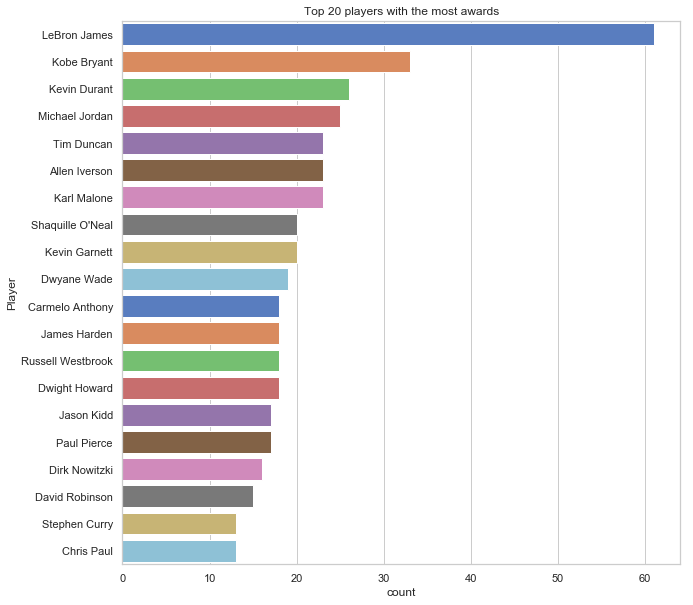

In [225]:
plt.figure(figsize=(10,10))
sns.countplot(y='Player',data=df,palette=sns.color_palette("muted") ,order=df.Player.value_counts().head(20).index)
plt.title('Top 20 players with the most awards')
plt.show()

* #### How many teams did player Lebron James win the award with


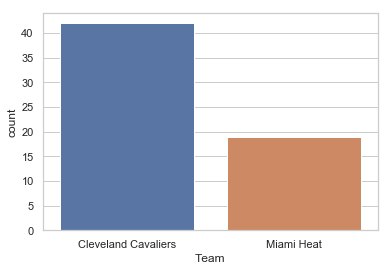

In [231]:
dft = df[df.Player=='LeBron James']
sns.countplot(x='Team',data=dft)
plt.show()


* #### His most dominant seasons



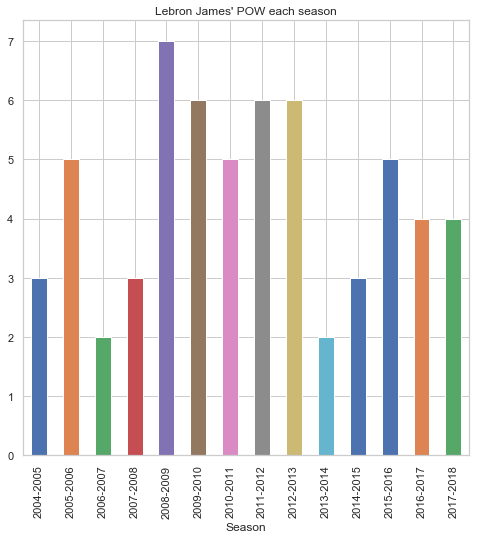

In [273]:
plt.figure(figsize=(8,8))
dft.groupby(['Season'])['Season'].count().plot(kind='bar')
plt.title("""Lebron James' POW each season""")
plt.show()

* #### Teams with most awards

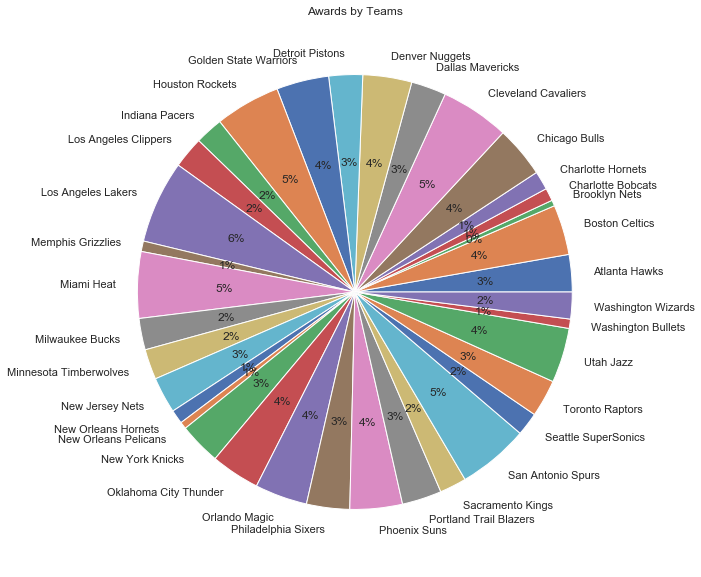

In [248]:
player_by_team = df['Player'].groupby(df['Team'])
player_by_team.count().plot.pie(title="Awards by Teams", figsize=(10,10),autopct='%1.0f%%')
plt.ylabel('')
plt.show()

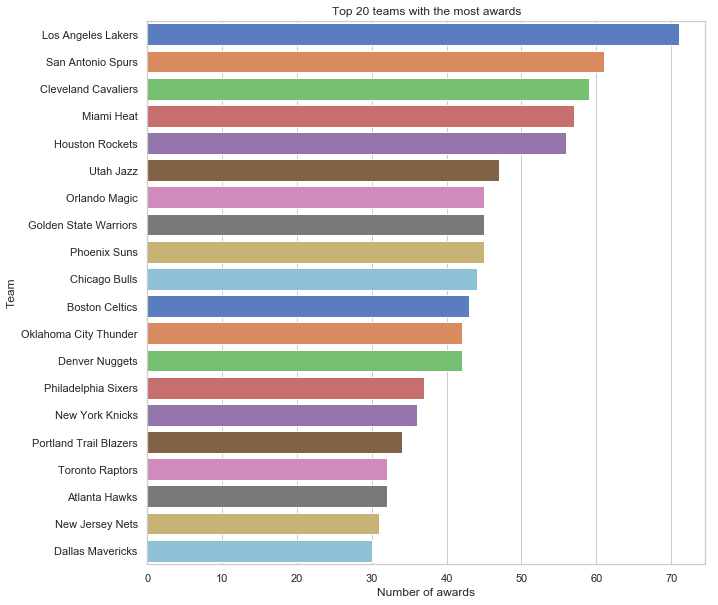

In [173]:
plotdata = df['Team'].value_counts().head(20)
plt.figure(figsize=(10,10))
sns.countplot(y='Team',data=df,palette=sns.color_palette("muted")  ,order=df.Team.value_counts().head(20).index)
plt.title('Top 20 teams with the most awards')
plt.xlabel('Number of awards')
plt.show()


* #### Who are the players who won for the Lakers

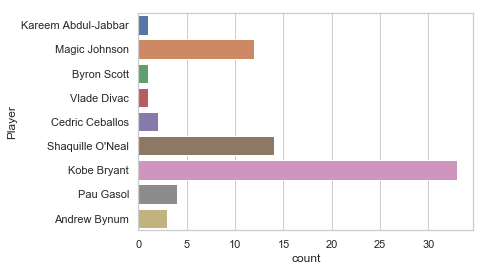

In [192]:
dft = df[df.Team=='Los Angeles Lakers']
sns.countplot(y='Player', data=dft)
plt.show()

* #### Which conference won more awards

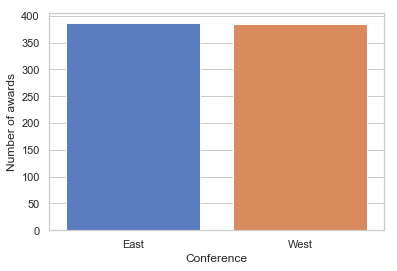

East    386
West    385
Name: Conference, dtype: int64

In [93]:
sns.countplot(x='Conference', data=df,palette=sns.color_palette("muted"), order=df.Conference.value_counts().index)
plt.ylabel('Number of awards')
plt.show()
df.Conference.value_counts()

* #### Player positions and number of awards

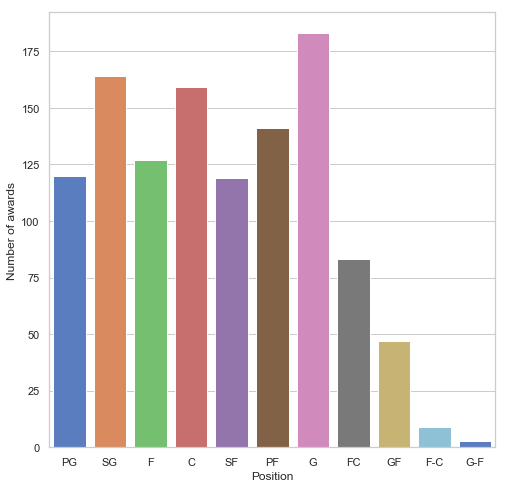

G      183
SG     164
C      159
PF     141
F      127
PG     120
SF     119
FC      83
GF      47
F-C      9
G-F      3
Name: Position, dtype: int64

In [169]:
plt.figure(figsize=(8,8))
sns.countplot(x='Position', data=df,palette=sns.color_palette("muted"))

plt.ylabel('Number of awards')
plt.show()
df.Position.value_counts()

* #### Correlation of Height and number of awards

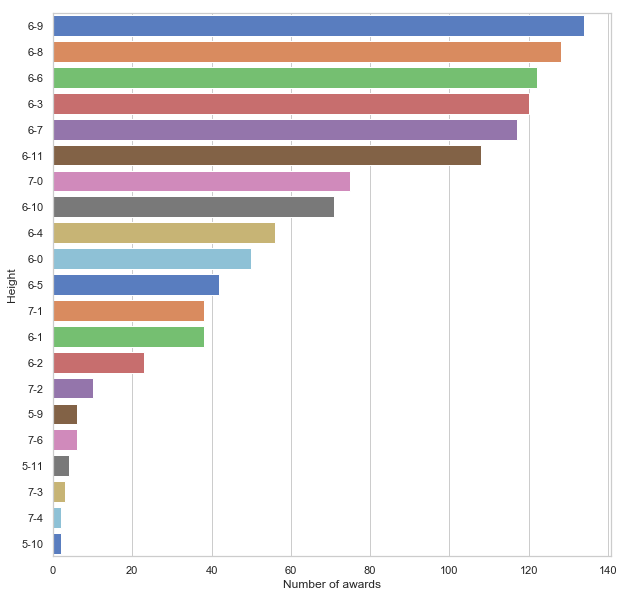

6-9    134
6-8    128
6-6    122
6-3    120
6-7    117
Name: Height, dtype: int64

In [170]:
plt.figure(figsize=(10,10))
sns.countplot(y='Height', data=df,palette=sns.color_palette("muted"),order=df.Height.value_counts().index)
plt.xlabel('Number of awards')
plt.show()
df.Height.value_counts().head()

* #### Age of Winners

/Users/longnguyen/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


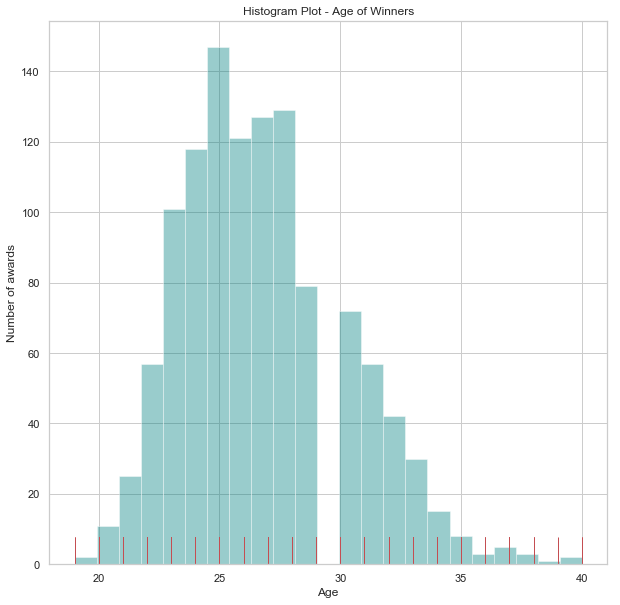

In [171]:
# sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
sns.distplot(df['Age'],kde=False, rug=True,color='teal', rug_kws={"color": "R"})
plt.title('Histogram Plot - Age of Winners')
plt.ylabel('Number of awards')
plt.show()

* #### Oldest and youngest players to win POW

In [153]:
df[df['Age']==df['Age'].max()]

,Active season,Player,Team,Conference,Date,Position,Height,Weight,Age,Draft Year,Seasons in league,Season,Season short,Real_value
440,0,Michael Jordan,Washington Wizards,East,2003-03-02,SG,6-6,215,40,1984,14,2002-2003,2003,0.5
455,0,Michael Jordan,Washington Wizards,East,2003-01-05,SG,6-6,215,40,1984,14,2002-2003,2003,0.5


In [154]:
df[df['Age']==df['Age'].min()]

,Active season,Player,Team,Conference,Date,Position,Height,Weight,Age,Draft Year,Seasons in league,Season,Season short,Real_value
476,0,Carmelo Anthony,Denver Nuggets,West,2004-04-12,F,6-8,240,19,2003,0,2003-2004,2004,0.5
484,0,Carmelo Anthony,Denver Nuggets,West,2004-03-14,F,6-8,240,19,2003,0,2003-2004,2004,0.5


* #### Correlation Matrix

In [235]:
# Convert height into numbers
df['Height'].value_counts()

205.74    134
203.20    128
198.12    122
190.50    120
200.66    117
210.82    108
213.36     75
208.28     71
193.04     56
182.88     50
195.58     42
185.42     38
215.90     38
187.96     23
218.44     10
228.60      6
175.26      6
180.34      4
220.98      3
177.80      2
223.52      2
Name: Height, dtype: int64

In [177]:
def convert_Height(item):
    a=int(item.split('-')[0])
    b=int(item.split('-')[1])
    h=a*30.48+b*2.54
    return h
df['Height']=df['Height'].apply(lambda x: convert_Height(x))


In [180]:
df['Height'].head()

0    195.58
1    198.12
2    198.12
3    218.44
4    205.74
Name: Height, dtype: float64

In [182]:
df.head()

,Active season,Player,Team,Conference,Date,Position,Height,Weight,Age,Draft Year,Seasons in league,Season,Season short,Real_value
0,0,Micheal Ray Richardson,New Jersey Nets,NaN,1985-04-14,PG,195.58,189,29,1978,6,1984-1985,1985,1.0
1,0,Derek Smith,Los Angeles Clippers,NaN,1985-04-07,SG,198.12,205,23,1982,2,1984-1985,1985,1.0
2,0,Calvin Natt,Denver Nuggets,NaN,1985-04-01,F,198.12,220,28,1979,5,1984-1985,1985,1.0
3,0,Kareem Abdul-Jabbar,Los Angeles Lakers,NaN,1985-03-24,C,218.44,225,37,1969,15,1984-1985,1985,1.0
4,0,Larry Bird,Boston Celtics,NaN,1985-03-17,SF,205.74,220,28,1978,5,1984-1985,1985,1.0


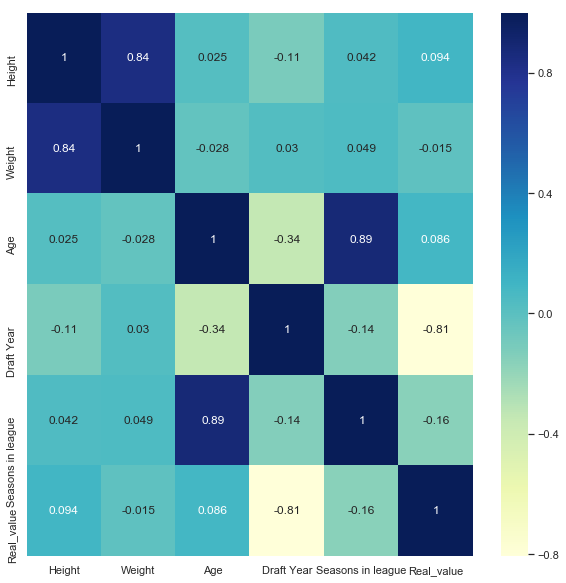

In [179]:
# Active season, Season short, Draft Year aren't important in correlation
# Therefore drop them
plt.figure(figsize=(10,10))
matrixdf = df.drop(['Active season','Season short' ], axis=1)
sns.heatmap(matrixdf.corr(), cmap="YlGnBu",annot=True)
plt.show()

* #### What can I predict from this data

In [290]:
df_seasons_in_league_domination = df.groupby(['Seasons in league'])['Real_value'].sum().reset_index()
df_seasons_in_league_domination

newdf = df.groupby(['Player'])['Real_value'].sum().reset_index()

newdf.sort_values(by=['Real_value'], ascending=False)

df1 = df.groupby(['Player']).mean().reset_index()

dfmerge = df1.merge(newdf,left_on='Player', right_on='Player')
dfmerge.head()

,Player,Active season,Height,Weight,Age,Draft Year,Seasons in league,Season short,Real_value_x,Real_value_y
0,Aaron McKie,0.0,195.58,209.0,28.000000,1994.0,6.000000,2001.000000,1.0,1.0
1,Adrian Dantley,0.0,195.58,208.0,30.000000,1976.0,9.000000,1986.000000,1.0,1.0
2,Al Harrington,0.0,205.74,245.0,29.000000,1998.0,10.000000,2009.000000,0.5,0.5
3,Al Horford,0.0,208.28,245.0,27.333333,2007.0,6.333333,2014.333333,0.5,1.5
4,Al Jefferson,0.0,208.28,289.0,26.000000,2004.0,6.000000,2011.000000,0.5,3.5


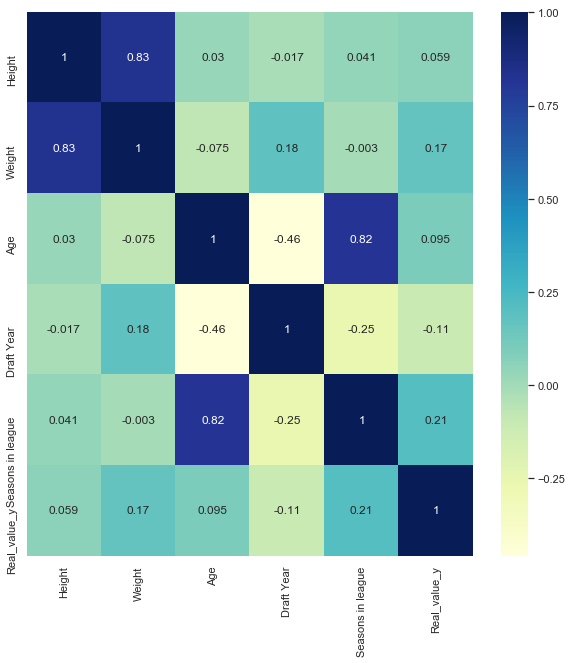

In [296]:
plt.figure(figsize=(10,10))
dfmerge = dfmerge.drop(['Active season','Season short','Real_value_x'], axis=1)
sns.heatmap(dfmerge.corr(), cmap="YlGnBu",annot=True)
plt.show()


### Train and test model

In [316]:
X = dfmerge[['Height','Weight','Age','Seasons in league','Draft Year']]
y = dfmerge['Real_value_y']

In [317]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)


In [318]:
from sklearn.linear_model import LinearRegression

In [319]:
lm = LinearRegression()

In [320]:
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

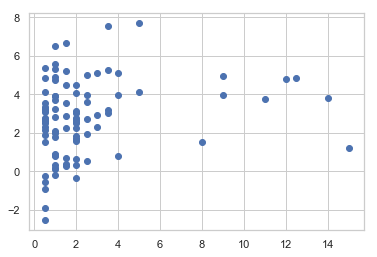

In [321]:
plt.scatter(y_test, predictions)
plt.show()

/Users/longnguyen/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


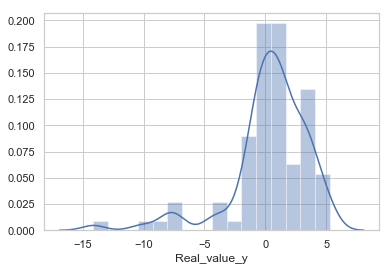

In [315]:
sns.distplot(predictions-y_test)